<img src="escuela_economia_una_logo.png" width="260" height="60">
<center>
    <b>Econometría</b><br>
    <b>Profesor:  Alexander Amoretti</b><br>
    <b>Desarrollo:  Diego Armando Barquero Sánchez, Estudiante de Tercer Ciclo</b>
<br><br>   
<div style="font-size:200%;color:white; background-color: #A93226;">Hodrick Prescott</div>
<div style="font-size:100%;color:white; background-color: #A93226;">Desestacionalizando el PIB</div>

<i>Creado:     2023-Jul-15 
    <br>
    Actualizado: 2023-Jul-18 </i>

# *Librerías*

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

# *Cargamos los datos*

In [87]:
datos = pd.read_excel('datos.xlsx')

## *Llamamos a las primeras 5 filas del DataFrame*

In [88]:
datos.head()

,Periodo,PIB desestacionalizada,LOGPIB
0,1991Q1,2648283.52,14.789422
1,1991Q2,2670737.47,14.797865
2,1991Q3,2684833.13,14.803129
3,1991Q4,2797570.45,14.844262
4,1992Q1,2849853.99,14.862778


## *Llamamos a las últimas 5 filas del DataFrame*

In [89]:
datos.tail()

,Periodo,PIB desestacionalizada,LOGPIB
123,2021Q4,9603561.81,16.077645
124,2022Q1,9610616.39,16.078379
125,2022Q2,9657776.14,16.083274
126,2022Q3,9765123.49,16.094328
127,2022Q4,9765123.49,16.094328


## *Cambiamos el índice*

In [90]:
index = pd.Index(sm.tsa.datetools.dates_from_range("1991Q1", "2022Q4"))
datos.set_index(index, inplace=True)

In [91]:
datos.drop("Periodo", axis = 1, inplace = True) # borramos la columna periodo por que ya no me sirve

In [92]:
datos.head() # confirmamos que se borro


,PIB desestacionalizada,LOGPIB
1991-03-31,2648283.52,14.789422
1991-06-30,2670737.47,14.797865
1991-09-30,2684833.13,14.803129
1991-12-31,2797570.45,14.844262
1992-03-31,2849853.99,14.862778


# *Realizamos gráficos para visualizar las series de tiempo*

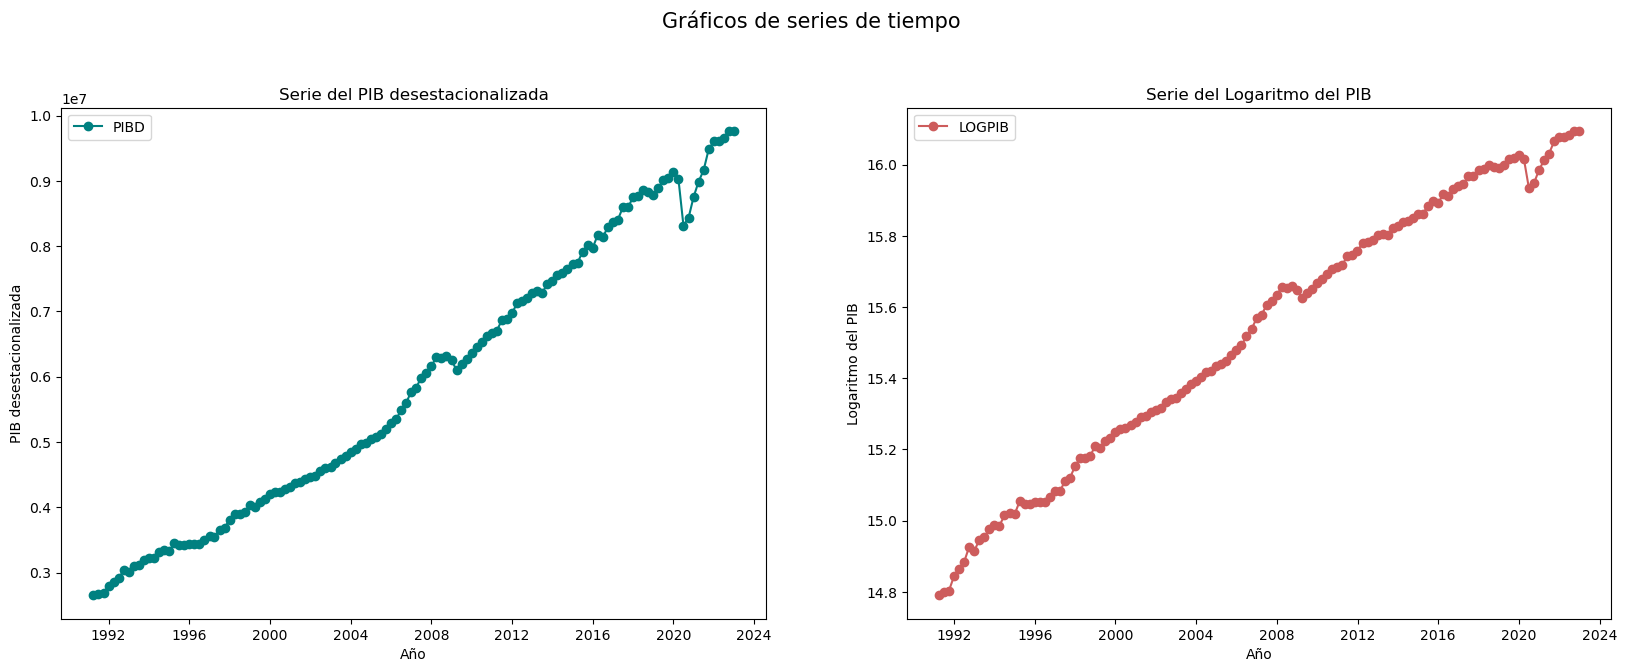

In [93]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,7))
fig.suptitle('Gráficos de series de tiempo', fontsize =15)
ax1.plot(datos.index, datos['PIB desestacionalizada'], '-o',  color = 'teal', label = 'PIBD')
ax1.set(xlabel= 'Año', ylabel= "PIB desestacionalizada")
ax1.set_title('Serie del PIB desestacionalizada')
ax1.legend(loc='best')
ax2.plot(datos.index, datos['LOGPIB'], '-o',  color = 'indianred', label = 'LOGPIB')
ax2.set(xlabel= 'Año', ylabel= "Logaritmo del PIB")
ax2.set_title('Serie del Logaritmo del PIB')
ax2.legend(loc='best')
plt.subplots_adjust(top=0.84)
plt.show()

# *Aplicamos el Hodrick Prescott empleando la optimización*
Si no quisieramos que se optimizará de forma automatica empleariamos un parametro adicional.
Ejemplo: sm.tsa.filters.hpfilter(datos["LOGPIB"], 1600)<br>
En el ejemplo el segundo parametro en el método sera el lamda a emplear

In [94]:
LOGPIB_ciclo, LOGPIB_tendencia = sm.tsa.filters.hpfilter(datos["LOGPIB"]) # asignamos los resultados a dos variables

In [95]:
datos["Ciclo_LOGPIB"] = LOGPIB_ciclo # guardamos esas nuevas variables dentro del dataframe como columnas
datos["Tendencia_LOGPIB"] = LOGPIB_tendencia

In [96]:
datos.head() # vemos si efectivamente se guardaron

,PIB desestacionalizada,LOGPIB,Ciclo_LOGPIB,Tendencia_LOGPIB
1991-03-31,2648283.52,14.789422,-0.018053,14.807475
1991-06-30,2670737.47,14.797865,-0.024785,14.822650
1991-09-30,2684833.13,14.803129,-0.034685,14.837814
1991-12-31,2797570.45,14.844262,-0.008678,14.852940
1992-03-31,2849853.99,14.862778,-0.005200,14.867979


## *Gráfico para visualizar los resultados*
En este caso realice dos gráficos <br>
- El primero para visualizar la diferencia entre el LOGPIB y si tendencia ( Brecha del Producto ) 
- El segundo lo separe debido a que por las dimensiones el gráfico no se veía adecuadamente( dejo el código en comentario por si desean ver los tres elementos gráficados )

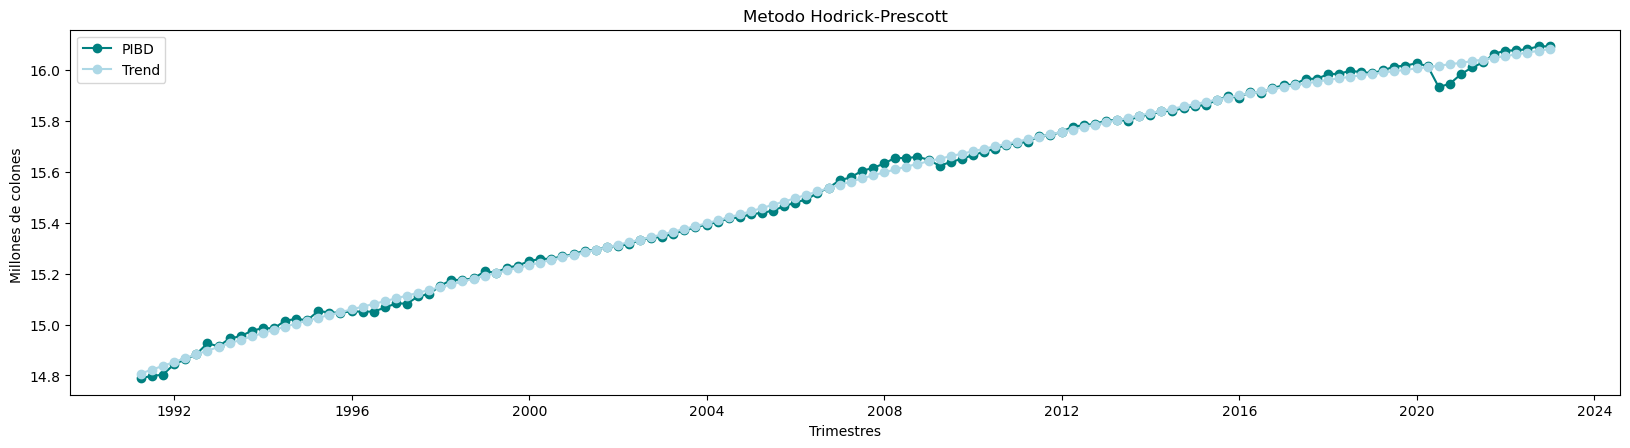

In [98]:
fig, (ax1) = plt.subplots(1,1, figsize = (20,5))
ax1.plot(datos.index, datos['LOGPIB'], '-o',  color = 'teal', label = 'PIBD')
ax1.plot(datos.index, datos['Tendencia_LOGPIB'], '-o',  color = 'lightblue', label = 'Trend')
#ax1.plot(datos.index, datos["Ciclo_LOGPIB"],'-o',  color = 'green', label = 'Cycle')
ax1.set(xlabel= 'Trimestres', ylabel= "Millones de colones ")
ax1.set_title('Metodo Hodrick-Prescott')
ax1.legend(loc='best', fontsize = 10)

plt.subplots_adjust(top=0.84)

plt.show()

In [100]:
import plotly.graph_objects as go # Gráfico interactivo para ello se empleó la librería Plotly

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=datos.index, y=datos["Ciclo_LOGPIB"] , name='Ciclo',
                         line=dict(color='royalblue', width=4, dash='dot')))
fig.show()

# Bibliografía y Documentación de las Librerías

##### Referencias Bibliográficas
- Odin, & Odin. (2023, 19 junio). Unraveling trends and cycles: An introduction to the Hodrick-Prescott filter - AITechTrend. AITechTrend - Further into the Future. https://aitechtrend.com/unraveling-trends-and-cycles-an-introduction-to-the-hodrick-prescott-filter/ 
- Sharma, P. (2021, 16 diciembre). Time Series Analysis in Python - Parkash Sharma - Medium. Medium. https://medium.com/@parkashsharma/time-series-analysis-in-python-4f2e7a453ded 
- Verma, Y., Verma, Y., Verma, Y., & Verma, Y. (2022). A complete guide to Hodrick–Prescott filter in time-series analysis. Analytics India Magazine. https://analyticsindiamag.com/a-complete-guide-to-hodrick-prescott-filter-in-time-series-analysis/

##### Documentación Librerías
- Numpy : https://numpy.org/doc/stable/
- Pandas : https://pandas.pydata.org/docs/getting_started/index.html
- Statsmodels : https://www.statsmodels.org/devel/index.html
- Matplotlib : https://matplotlib.org/stable/gallery/index.html
- Seaborn : https://seaborn.pydata.org/
- Scikit-Learn : https://scikit-learn.org/stable/